<h2> <center> Machine Learning  <center> </h2>


      
<h3>  <center>Conceitos básicos : 
    
   
    
     Normalização dos dados 
     
     Treinamento supervisionado e não-supervisionado

     Regressão não-linear  

<h2> <center>O que é ? Aonde é aplicado ? </h2>

<h3>Machine learning is a subset of AI that uses computer algorithms to analyze data and make intelligent decisions based on what it is learned without being explicitly programmed. Machine learning algorithms are trained with large sets of data and they learn from examples. They do not follow rules-based algorithms. Machine learning is what enables machines to solve problems on their own and make accurate predictions using the provided data.</h3>

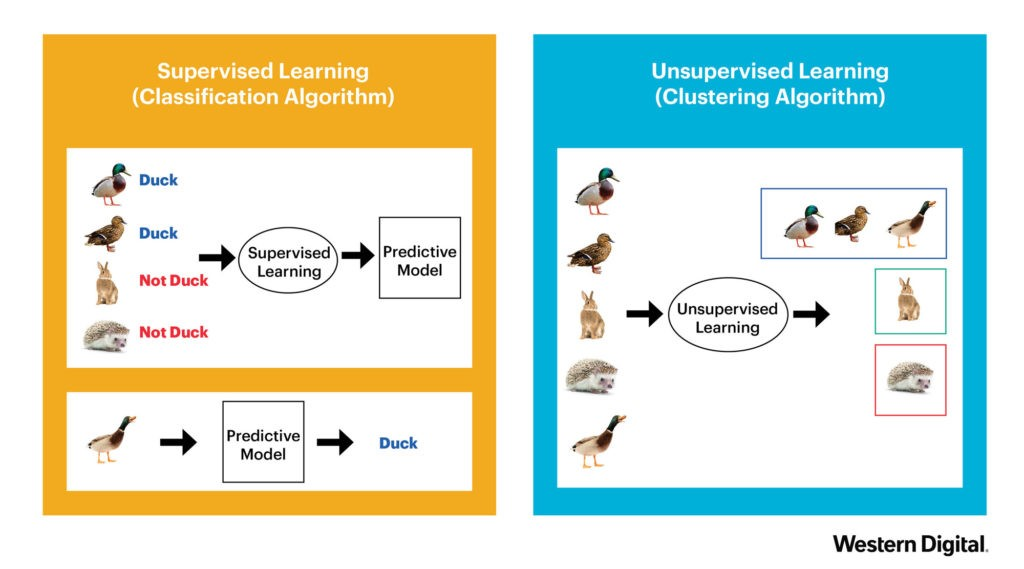

In [129]:
<h2> Machine Learning </h2>from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
x=np.arange(-10,11,0.1)

In [149]:
y = 1*(x**2) + 1*x + 3

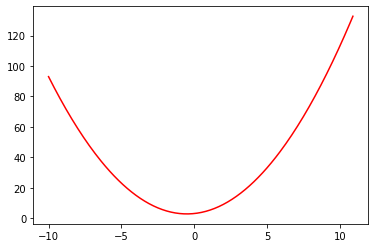

In [150]:
plt.plot(x,y,'r')

In [166]:
y_noise = 5 * np.random.normal(size=x.size)

In [167]:
ydata = y + y_noise 

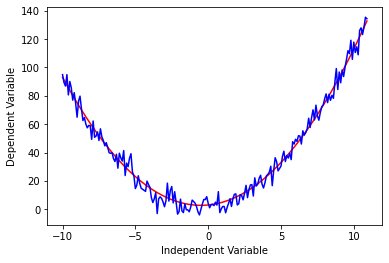

In [168]:
plt.plot(x,y,'r')
plt.plot(x,ydata,'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [169]:
pearson_coef, p_value = stats.pearsonr(x, y)
print("The Pearson Correlation Coefficient (x,y) without noise is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient (x,y) without noise is 0.3307108027122676  with a P-value of P = 9.462588289129882e-07


In [170]:
pearson_coef, p_value = stats.pearsonr(x, ydata)
print("The Pearson Correlation Coefficient (x,ydata) with noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,ydata) with noise is 0.33494976333763693  with a P-value of P = 6.72292422096003e-07


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, ydata, test_size=0.30, random_state=0)

In [172]:
poly = PolynomialFeatures(degree=2)
X_T = poly.fit_transform(X_train.reshape(-1,1))
X_T

array([[ 1.00000000e+00, -3.90000000e+00,  1.52100000e+01],
       [ 1.00000000e+00, -7.60000000e+00,  5.77600000e+01],
       [ 1.00000000e+00, -7.00000000e+00,  4.90000000e+01],
       [ 1.00000000e+00, -4.00000000e+00,  1.60000000e+01],
       [ 1.00000000e+00, -4.40000000e+00,  1.93600000e+01],
       [ 1.00000000e+00,  5.30000000e+00,  2.80900000e+01],
       [ 1.00000000e+00, -1.10000000e+00,  1.21000000e+00],
       [ 1.00000000e+00, -8.10000000e+00,  6.56100000e+01],
       [ 1.00000000e+00,  5.70000000e+00,  3.24900000e+01],
       [ 1.00000000e+00,  3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -4.60000000e+00,  2.11600000e+01],
       [ 1.00000000e+00,  6.80000000e+00,  4.62400000e+01],
       [ 1.00000000e+00, -4.90000000e+00,  2.40100000e+01],
       [ 1.00000000e+00,  8.20000000e+00,  6.72400000e+01],
       [ 1.00000000e+00,  4.30000000e+00,  1.84900000e+01],
       [ 1.00000000e+00,  6.00000000e-01,  3.60000000e-01],
       [ 1.00000000e+00,  3.90000000e+00

In [173]:
#lr.fit(x.reshape(-1,1),y)
lr = LinearRegression()
lr.fit(X_T,y_train)

LinearRegression()

In [174]:
y_T = lr.predict(X_T)
y_T[0:5]

array([13.15415714, 52.17426489, 43.96680965, 13.8449088 , 16.81005203])

In [175]:
lr.score(X_T,y_train)

0.9827779235384048

In [176]:
def quadratic(x,a,b,c):
     y = a*(x**2) + b*x + c 
     return y

In [177]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, X_train, y_train)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1],popt[2]))

 a = 1.010683, b = 1.076878, c = 1.981496


In [178]:
# build the model using train set
#popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = quadratic(X_test, *popt)
y_hat

array([ 70.77225044,   3.8704706 ,  40.13596641,  82.9652836 ,
        89.72530893,   3.07167608,   6.29184919,   9.2423332 ,
         1.91530022,  37.26815205,  26.63182269,  39.7070301 ,
        20.09861378,  93.53871573,   1.71245357,   2.45480447,
       101.40809323,  35.31116664,  10.0036037 ,  61.10941181,
        59.04310617,  65.84986966,  79.38049155,  17.60187198,
         1.76683004,  17.3263763 ,  10.99045959,  10.38753714,
        42.22676278,  84.15680116,   5.60606797,  31.52469593,
        20.66789439,   7.35839172,  87.84892601,  27.29377689,
        68.5428154 ,   7.19448923,  64.24950339,  18.13143534,
        95.47573962,  55.07179256,   2.57395623,  23.38627637,
        84.78800012,   6.01382842,  18.95670803,  27.64599288,
        11.83329479,   3.48983535,  49.35759184,   2.0992903 ,
        53.11423985, 109.60088926,  77.61841601,  31.90481022,
         3.76933928,  11.6135957 ,  13.60428599,   4.06905686,
       126.9567369 ,   3.23054508,   5.21852118])

In [179]:
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: " , r2_score(y_test,y_hat) )

Residual sum of squares (MSE): 20.108191
R2-score:  0.9829031663679236


In [180]:
y_test

array([ 79.72100972,  -1.65637987,  39.45744295,  90.05772109,
        99.17688337,  -2.35009486,   1.95388905,  10.23672505,
         5.47646201,  37.87872342,  29.9640581 ,  39.45628667,
        23.60274181,  96.7436764 ,   3.6859068 ,  -0.4209526 ,
       100.15352026,  38.7066855 ,   7.36739569,  59.09230587,
        57.62789894,  64.66719728,  76.90498876,  14.05072866,
         1.8492396 ,  17.60495324,  11.40037684,   6.64345777,
        47.60312349,  80.34022591,  16.03507964,  28.65806238,
        14.97365511,   5.89109422,  89.57504898,  27.2988623 ,
        62.77920622,  10.56867812,  60.03040971,  21.72918722,
        89.16359963,  50.73113749,   2.56138086,  24.61295124,
        80.59622351,  13.19147389,  23.94804666,  32.5217907 ,
         7.42496531,  -2.36070063,  56.71283016,   1.01003486,
        52.24109121, 119.12048352,  82.18883221,  36.25874333,
         0.26644777,  16.84208952,  17.14340452,   1.97185196,
       123.16024124,  12.41901725,   4.4789827 ])

<h2> A transformação funciona para f(x)  Polinomiais - E para outras funções não-lineareas ??? </h2>

In [192]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [196]:
x=np.arange(-3,3,0.1)
Y = sigmoid(x,1,1)

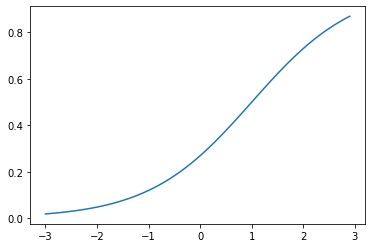

In [197]:
plt.plot(x,Y)

<h3> Por que às vezes (ou quase sempre) preciso normalizar os dados de entrada de uma ML ? </h3>

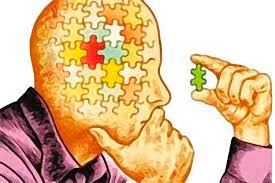

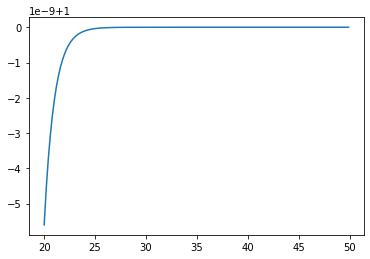

In [198]:
x=np.arange(20,50,0.1)
Y = sigmoid(x,1,1)
plt.plot(x,Y)

<h3>  <center>O que está ERRADO ???? 

      Dados de entrada precisam ser normalizados !!!! 
</h3>


In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x.reshape(-1,1)))
xT = scaler.transform(x.reshape(-1,1))
#xT = x/np.max(x)

StandardScaler()


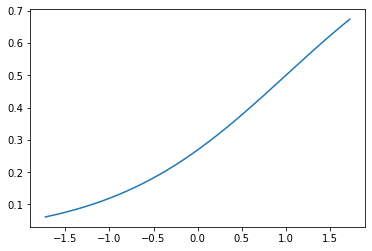

In [209]:
Y = sigmoid(xT,1,1)
plt.plot(xT,Y)

<h3>  <center> Vetor de entrada composto por N Features 
          
      com ranges diferentes também será necessário a 
    
            Normalização !!!!
 </h3> 

In [210]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [211]:
scaler.fit(df[['Humidity','Visibility (km)','Pressure (millibars)']])

StandardScaler()

In [212]:
dfT = scaler.transform(df[['Humidity','Visibility (km)','Pressure (millibars)']])

In [214]:
dfT

array([[ 0.79347043,  1.30697578,  0.10168518],
       [ 0.63999555,  1.30697578,  0.1059598 ],
       [ 0.79347043,  1.09958576,  0.10861007],
       ...,
       [-0.89475327,  1.37226523,  0.10621628],
       [-0.6901201 ,  1.37226523,  0.10869557],
       [-0.6389618 ,  1.23400522,  0.11049091]])